# $\color{#ff4b4b}{\text{Data Overviwe}}$  

#### All patients here are females at least 21 years old .
- **Pregnancies:** Number of times pregnant  
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
- **BloodPressure:** Diastolic blood pressure (mm Hg)  
- **SkinThickness:** Triceps skin fold thickness (mm)  
- **Insulin:** 2-Hour serum insulin (mu U/ml)  
- **BMI:** Body mass index (weight in kg/(height in m)^2)  
- **DiabetesPedigreeFunction:** Diabetes pedigree function  
- **Age:** Age (years)  
- **Outcome:** Class variable (**0** means tested negative for diabetes or **1** means tested positive for dabetes)

# $\color{#ff4b4b}{\text{Import Liberaries}}$  

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# $\color{#ff4b4b}{\text{Import Data}}$  

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# $\color{#ff4b4b}{\text{Data Exploration}}$  

In [4]:
df.sample(n=10,random_state=123)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
236,7,181,84,21,192,35.9,0.586,51,1
395,2,127,58,24,275,27.7,1.600,25,0
36,11,138,76,0,0,33.2,0.420,35,0
210,2,81,60,22,0,27.7,0.290,25,0
483,0,84,82,31,125,38.2,0.233,23,0
743,9,140,94,0,0,32.7,0.734,45,1
408,8,197,74,0,0,25.9,1.191,39,1
468,8,120,0,0,0,30.0,0.183,38,1
283,7,161,86,0,0,30.4,0.165,47,1
167,4,120,68,0,0,29.6,0.709,34,0


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### No categorical columns present in dataset. All columns are Numerical so we don't want to use Labelencoder

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Pregnancies:**
- Mean: 3.85 suggests that on average, women in the dataset have had around 4 pregnancies.
- Min/Max: Ranges from 0 to 17, indicating women with no pregnancies and some with up to 17 pregnancies.

**Glucose:**
- Mean: 120.89 mg/dL, which is slightly above the normal fasting glucose levels (70-100 mg/dL), suggesting a high proportion of individuals with elevated glucose levels.
- Min: Some individuals have a glucose value of 0, which could indicate missing or faulty data.
- Max: The maximum glucose value is 199 mg/dL, which is quite high, suggesting potential diabetes or prediabetes.

**Blood Pressure (Diastolic):**
- Mean: 69.1 mmHg, which is within the normal range (60-80 mmHg).
- Min: Blood pressure values of 0 may indicate missing data or measurement errors.
- Max: The maximum blood pressure is 122 mmHg, indicating hypertension in some individuals.

**Skin Thickness:**
- Mean: 20.54 mm, but the min value of 0 indicates missing or incorrect data, as skin thickness cannot be zero.
- Max: 99 mm suggests a high variation in skin thickness measurements.

**Insulin:**
- Mean: 79.8 µU/mL, but the min is 0, again suggesting some missing or incorrect values.
- Max: 846 µU/mL is very high, indicating insulin resistance or diabetes in some individuals.

**BMI (Body Mass Index):**
- Mean: 31.99, indicating that the average person in this dataset is overweight (a BMI of 25-29.9 is considered overweight, and over 30 is obese).
- Min: 0 may indicate missing data or errors, as BMI cannot be 0.
- Max: 67.1, suggesting severe obesity in some individuals.

**Diabetes Pedigree Function:**
- Mean: 0.47, which measures the genetic risk of diabetes.
- Min/Max: The range (0.078 to 2.42) shows significant variability in genetic predisposition to diabetes.

**Age:**
- Mean: 33.24 years, which indicates a relatively young population.
- Min/Max: The range is from 21 to 81, showing a mix of younger and older individuals.

**Outcome:**
- Mean: 0.35, meaning about 35% of the individuals in this dataset have diabetes.
- The outcome is binary, with a value of 0 indicating no diabetes and 1 indicating diabetes.


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# $\color{#ff4b4b}{\text{EDA}}$  

In [10]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
def median_target(var):   
    temp = df[df[var].notnull()]
    
    median_values = temp.groupby('Outcome')[[var]].median().reset_index()
    
    return median_values

In [13]:
columns = df.columns.drop("Outcome")

for i in columns:
    median_vals = median_target(i)

    df.loc[(df['Outcome'] == 0) & (df[i].isnull()), i] = median_vals.loc[median_vals['Outcome'] == 0, i].values[0]
    
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()), i] = median_vals.loc[median_vals['Outcome'] == 1, i].values[0]

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- The data is in the desired format and there are no duplicates nor missing values
- So let's check the outliers

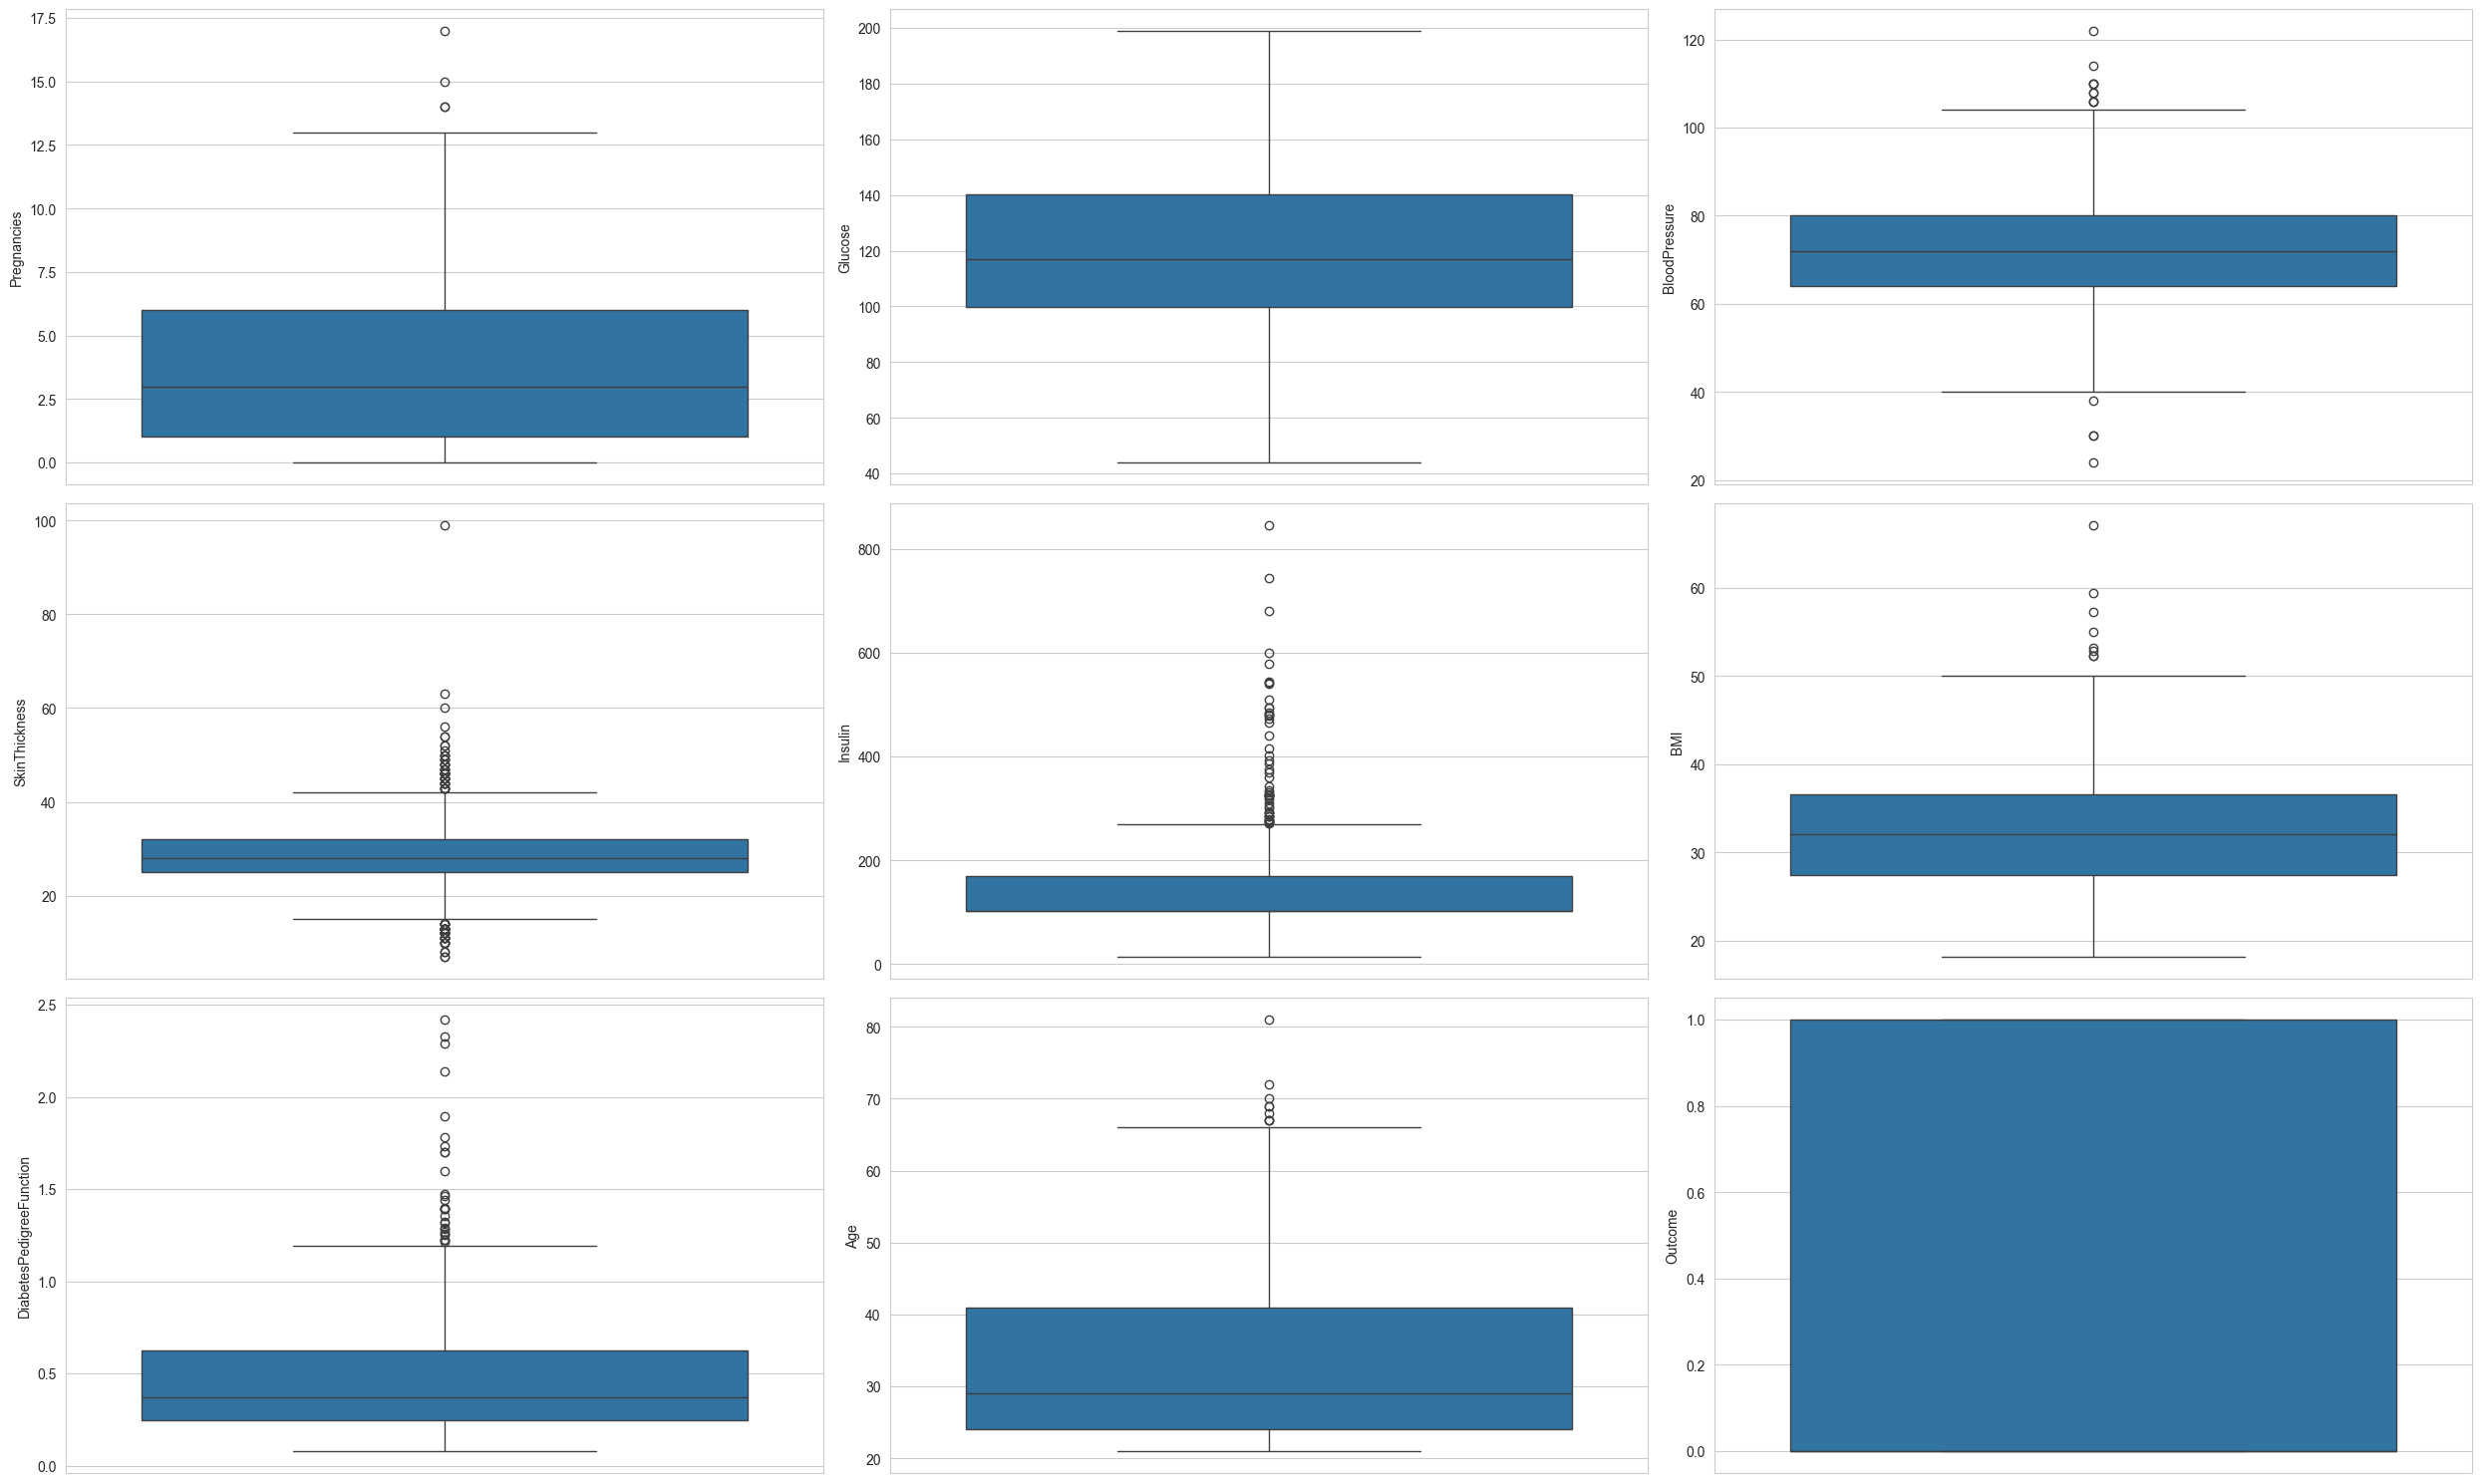

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(25,15))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i, 3)
    sns.boxplot(data=df, y=col, ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

#### We can find that all columns have outliers except Glucose column and Outcome column

### BloodPressure Column

In [17]:
q1=df.BloodPressure.quantile(0.25)
q3=df.BloodPressure.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
upper=q3+1.5*IQR
df.loc[df.BloodPressure>upper, "BloodPressure"]=upper
df.loc[df.BloodPressure < Lower, "BloodPressure"] = Lower

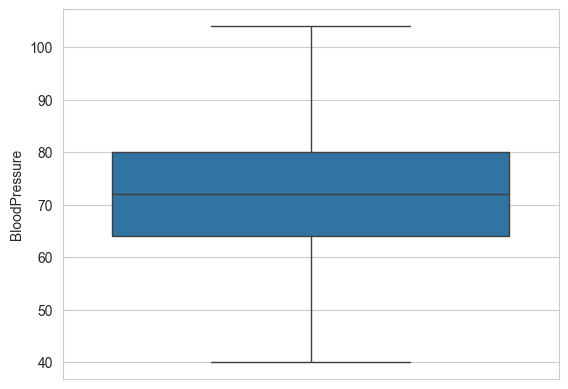

In [18]:
sns.boxplot(df.BloodPressure)
plt.show()

### SkinThickness

In [19]:
q1=df.SkinThickness.quantile(0.25)
q3=df.SkinThickness.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
upper=q3+1.5*IQR
df.loc[df.SkinThickness>upper, "SkinThickness"]=upper
df.loc[df.SkinThickness < Lower, "SkinThickness"] = Lower

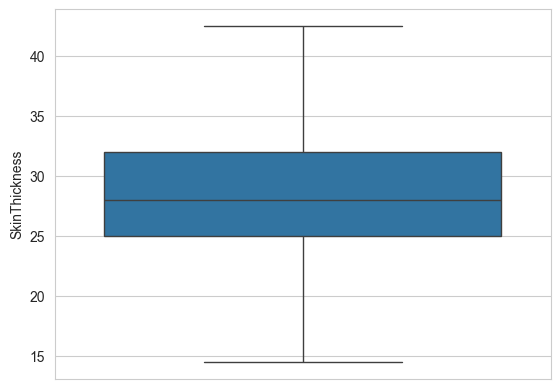

In [20]:
sns.boxplot(df.SkinThickness)
plt.show()

### Insulin

In [21]:
q1=df.Insulin.quantile(0.25)
q3=df.Insulin.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
upper=q3+1.5*IQR
df.loc[df.Insulin>upper, "Insulin"]=upper

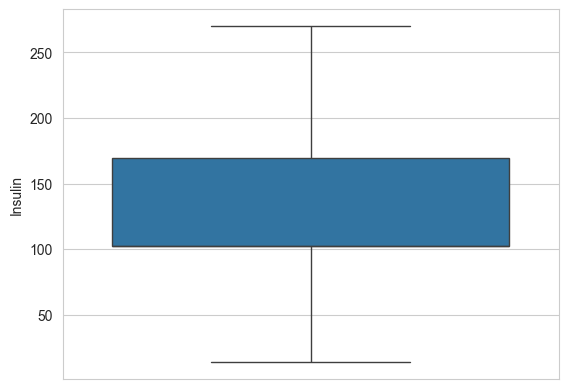

In [22]:
sns.boxplot(df.Insulin)
plt.show()

### BMI

In [23]:
q1=df.BMI.quantile(0.25)
q3=df.BMI.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
upper=q3+1.5*IQR
df.loc[df.BMI>upper, "BMI"]=upper

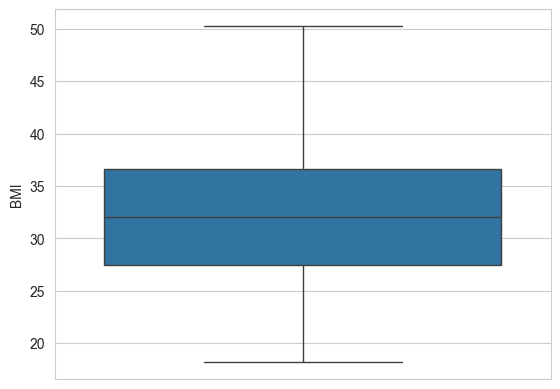

In [24]:
sns.boxplot(df.BMI)
plt.show()

### DiabetesPedigreeFunction

In [25]:
q1=df.DiabetesPedigreeFunction.quantile(0.25)
q3=df.DiabetesPedigreeFunction.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
upper=q3+1.5*IQR
df.loc[df.DiabetesPedigreeFunction>upper, "DiabetesPedigreeFunction"]=upper

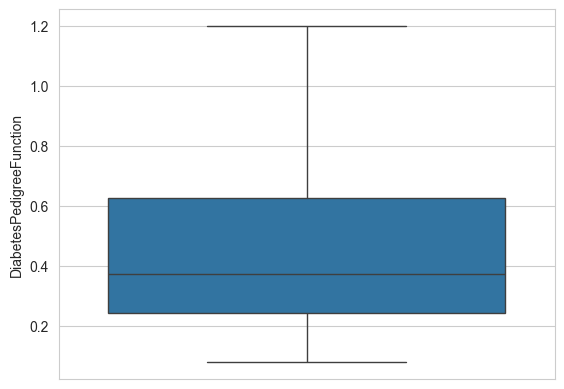

In [26]:
sns.boxplot(df.DiabetesPedigreeFunction)
plt.show()

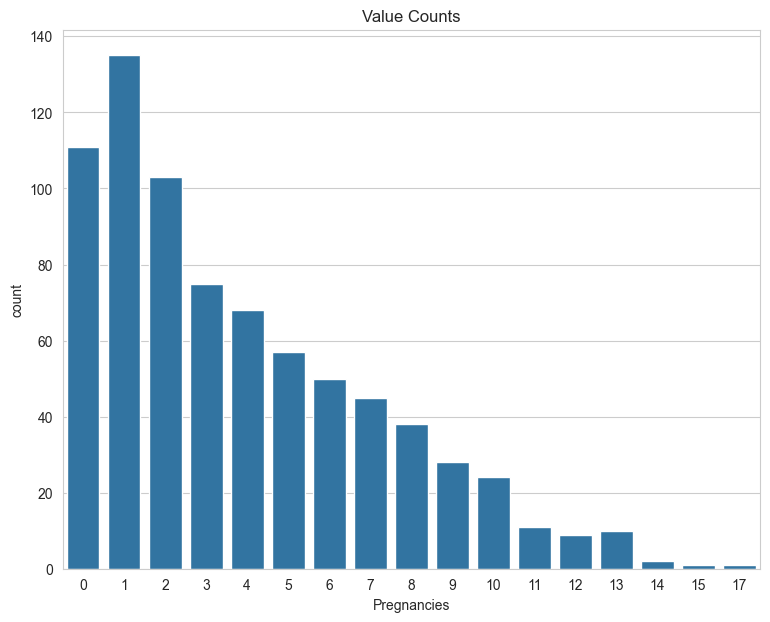

In [27]:
plt.figure(figsize=(9,7))

plt.title("Value Counts")
sns.countplot(x=df.Pregnancies,data=df)

plt.show()

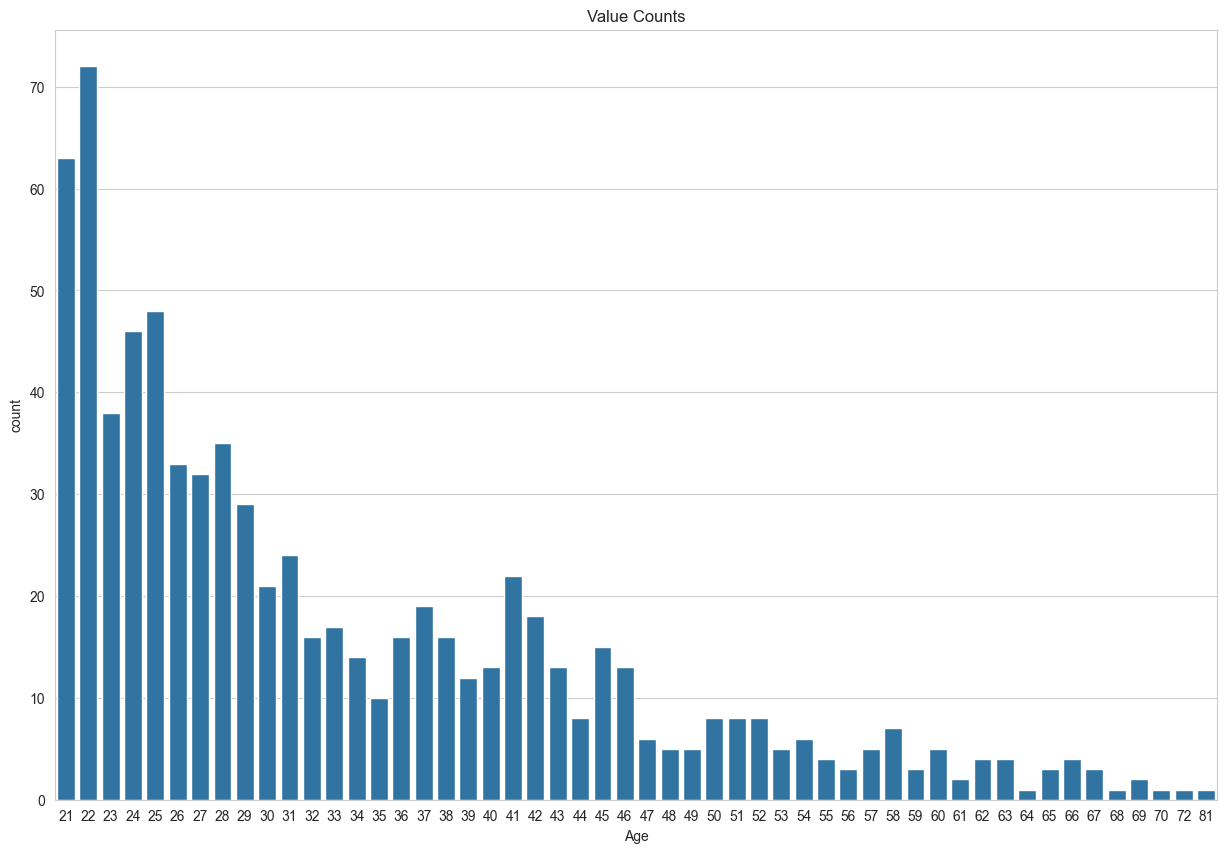

In [28]:
plt.figure(figsize=(15,10))

plt.title("Value Counts")
sns.countplot(x=df.Age,data=df)

plt.show()

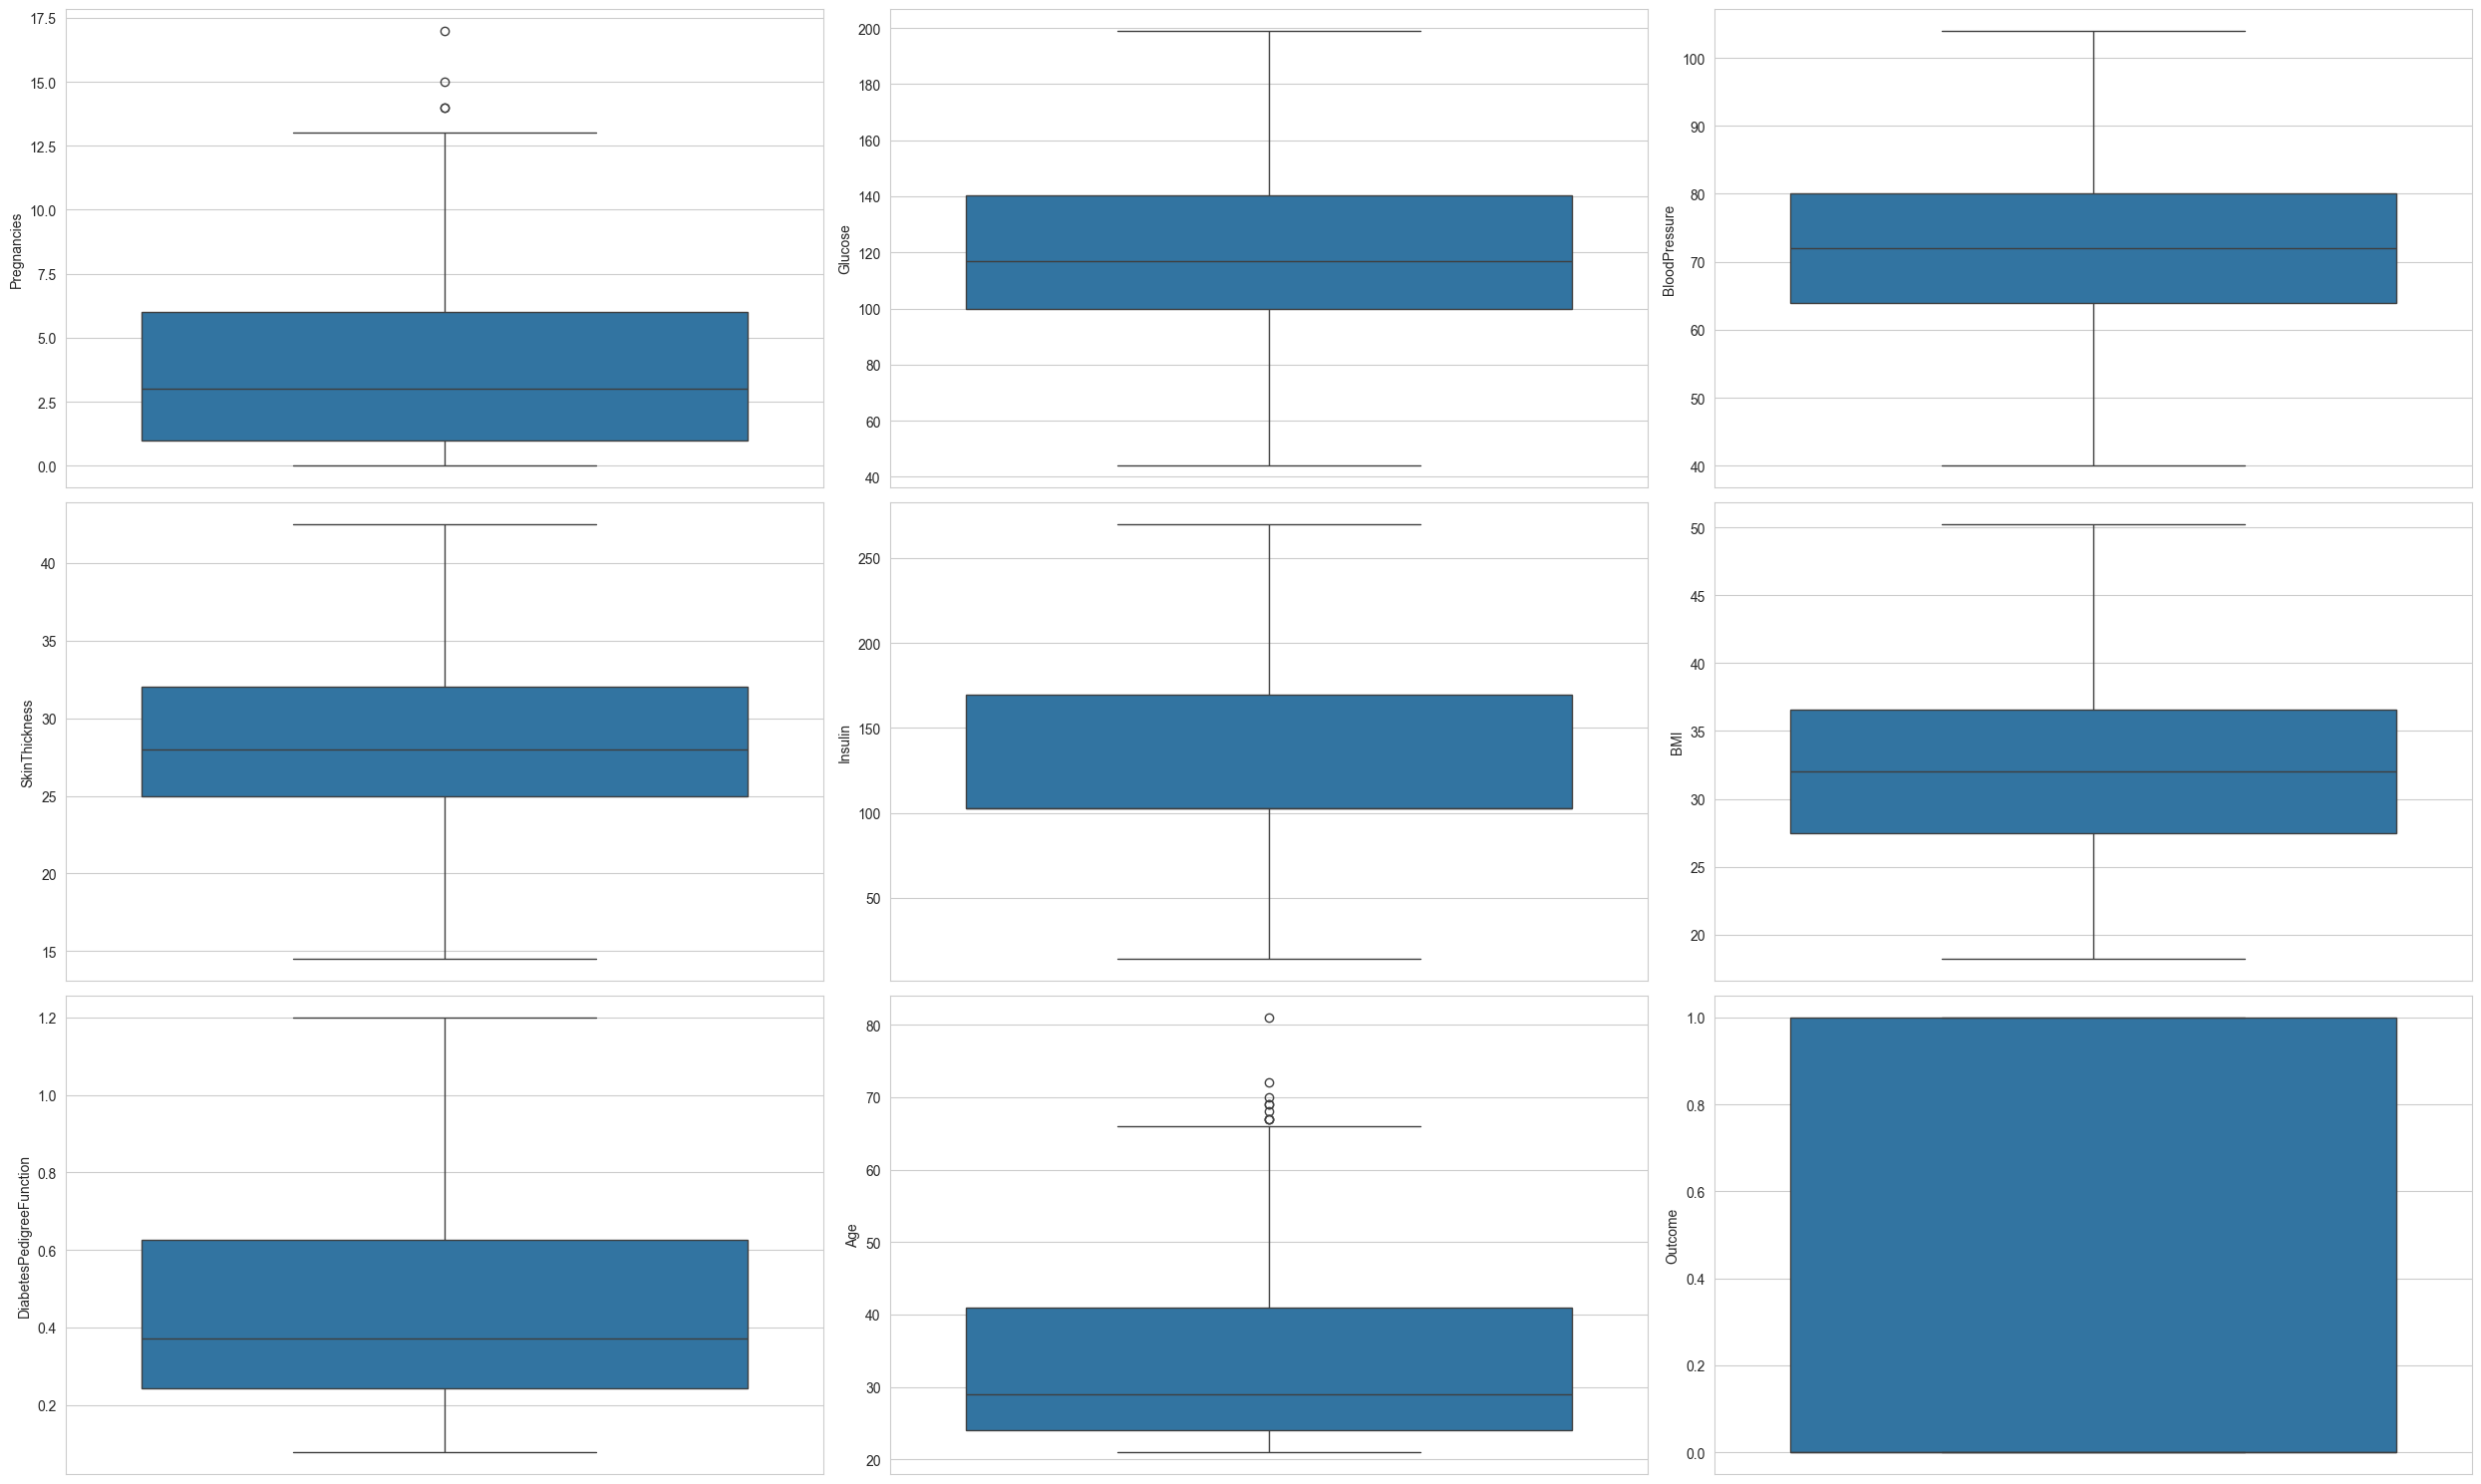

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(25,15))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i, 3)
    sns.boxplot(data=df, y=col, ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

#### Fisrt we want to know the correlation between columns

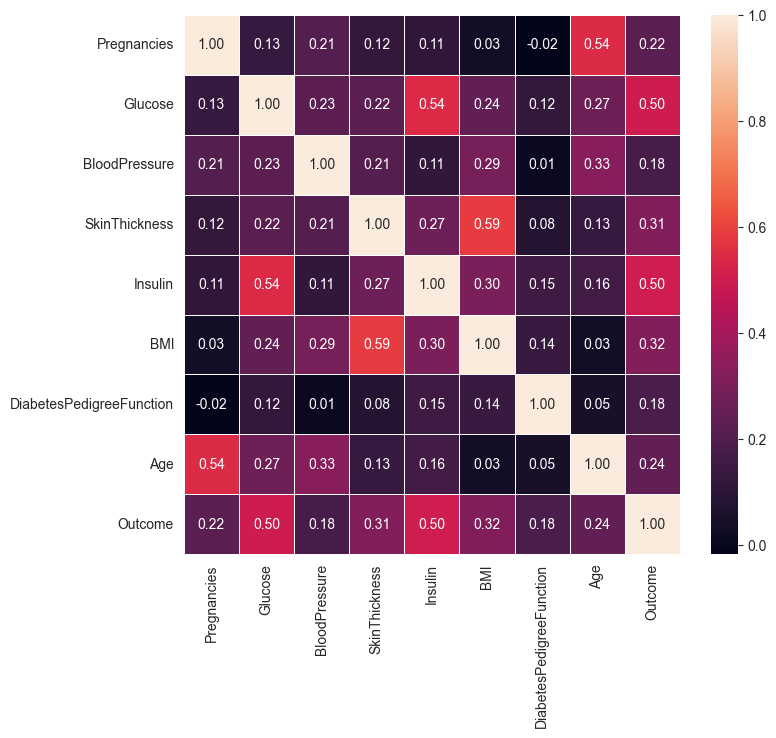

In [30]:
plt.figure(figsize=(8, 7)) 
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidths=0.5)
plt.show()

#### Then we want to know the distrbution of columns

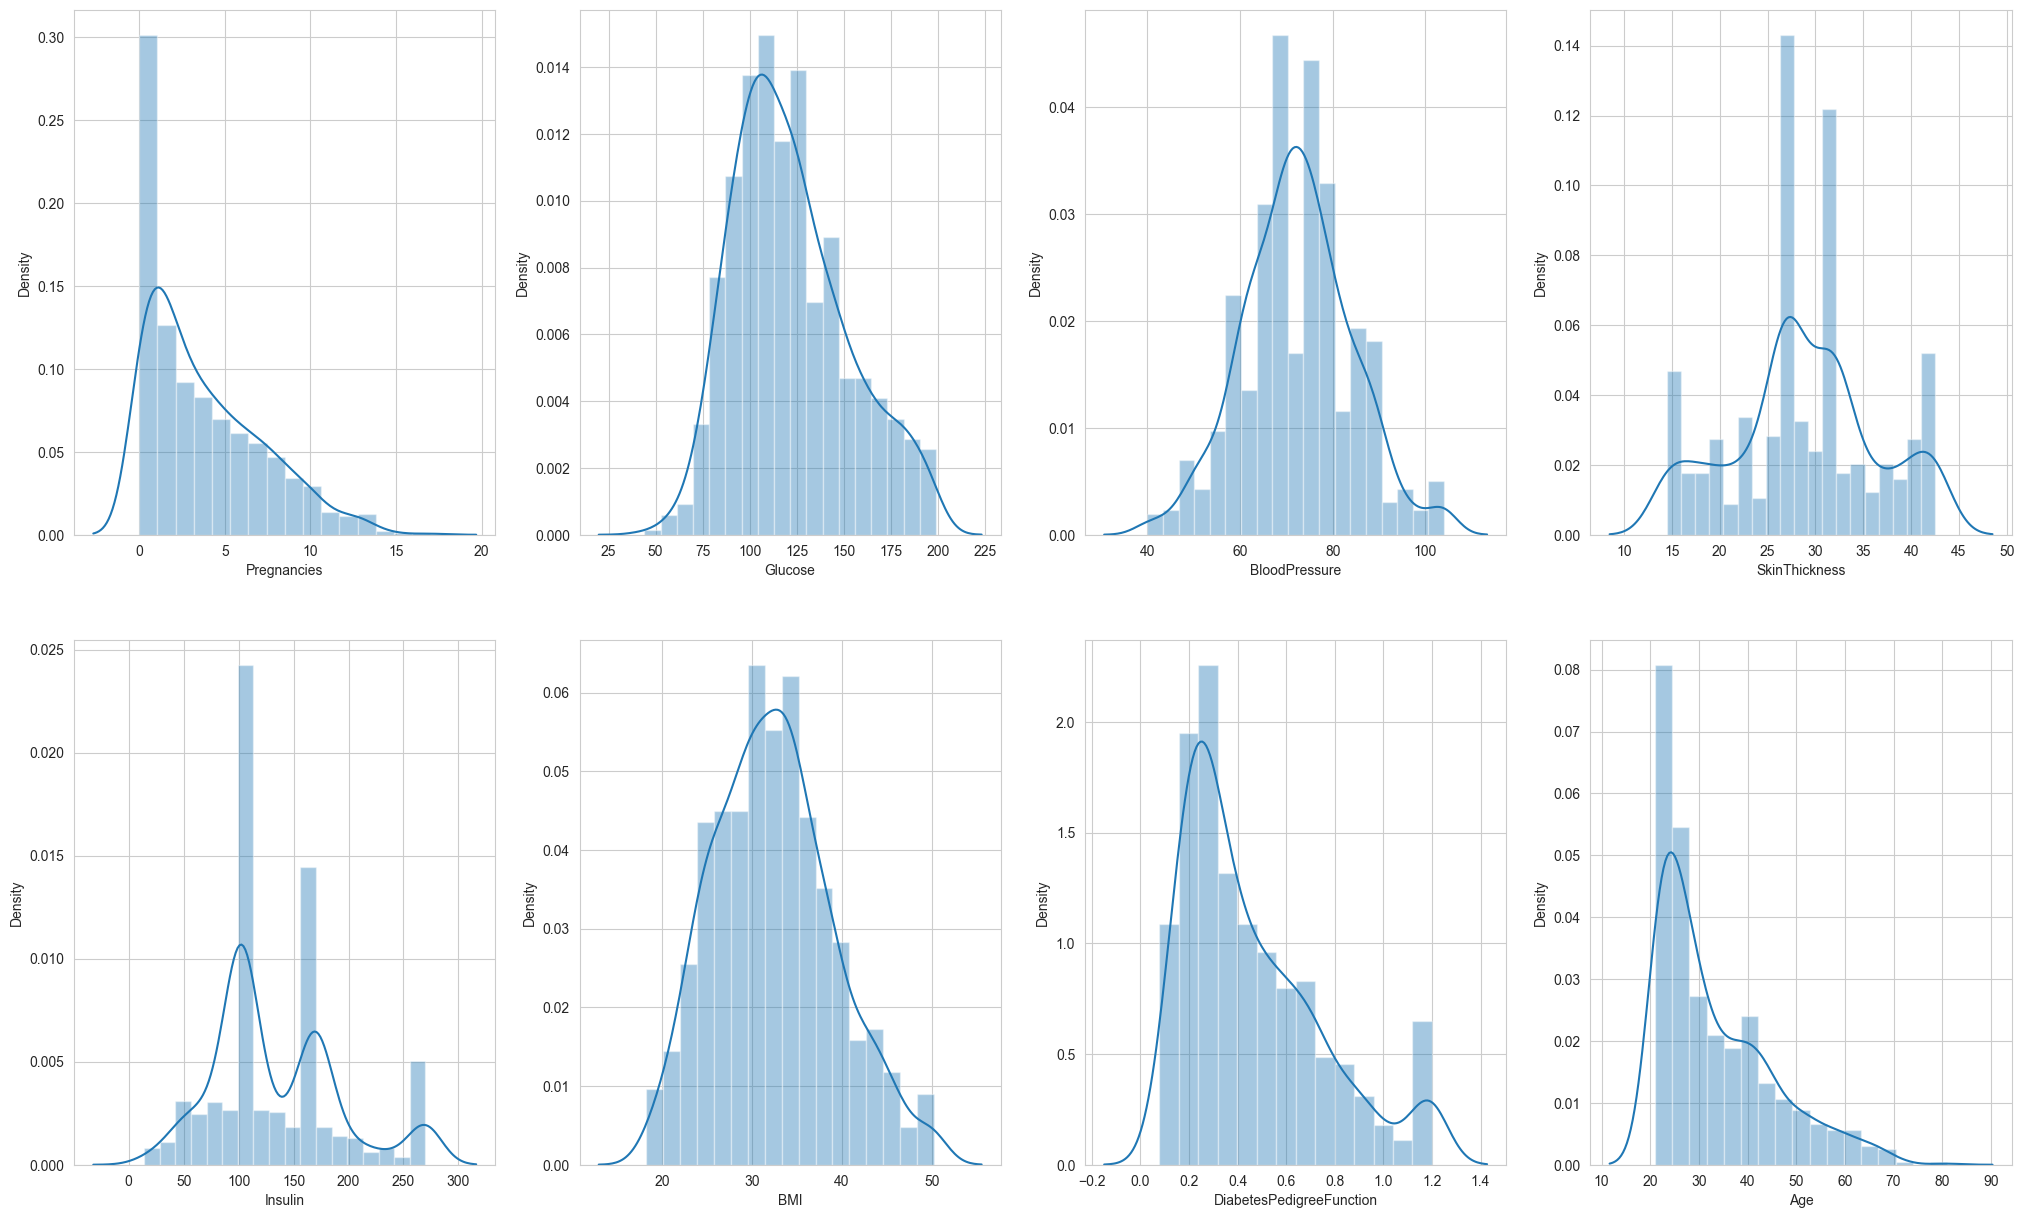

In [31]:
plt.figure(figsize=(25, 15))

plt.subplot(2,4,1)
sns.distplot(df.Pregnancies)

plt.subplot(2,4,2)
sns.distplot(df.Glucose)

plt.subplot(2,4,3)
sns.distplot(df.BloodPressure)

plt.subplot(2,4,4)
sns.distplot(df.SkinThickness)

plt.subplot(2,4,5)
sns.distplot(df.Insulin)

plt.subplot(2,4,6)
sns.distplot(df.BMI)

plt.subplot(2,4,7)
sns.distplot(df.DiabetesPedigreeFunction)

plt.subplot(2,4,8)
sns.distplot(df.Age)

plt.show()

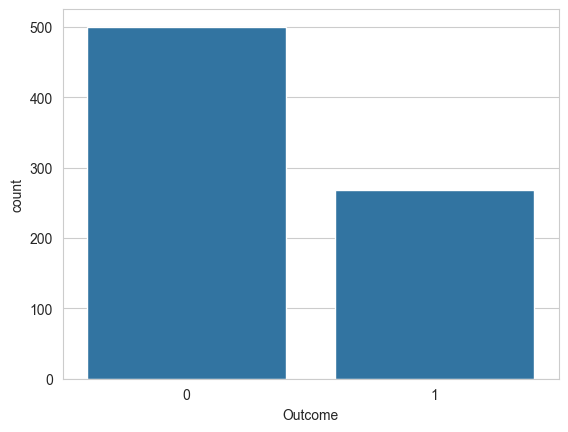

In [32]:
sns.countplot(x=df.Outcome,data=df)
plt.show()

In [33]:
affected = df[df.Outcome == 0]
not_affected = df[df.Outcome == 1]
print("Diabetes Size :",affected.shape[0])
print("No Diabetes Size :",not_affected.shape[0])

Diabetes Size : 500
No Diabetes Size : 268


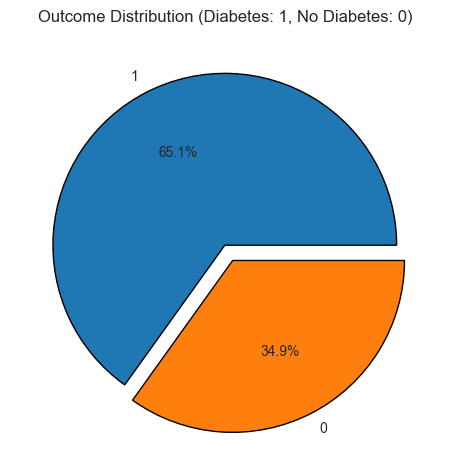

In [34]:
slices = [500,268]
labels = ['1','0']
explode = [0,0.1]
plt.pie(slices,labels=labels,explode = explode,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("Outcome Distribution (Diabetes: 1, No Diabetes: 0)")
plt.tight_layout()
plt.show()

### We can find that the data is imbalanced

# $\color{#ff4b4b}{\text{Import Models}}$  

In [ ]:
from sklearn.model_selection import train_test_split # to split data to train and test

from imblearn.over_sampling import RandomOverSampler # to handle imbalanced datasets

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

from collections import Counter # to count the occurrences of each element

# $\color{#ff4b4b}{\text{Data Preperation}}$  

In [36]:
x = df.drop('Outcome',axis=1) # Features
y = df.Outcome # target

In [37]:
over = RandomOverSampler(random_state=41)
x_over,y_over = over.fit_resample(x,y)

In [38]:
print("old shape {}".format(Counter(y)))
print("new shape {}".format(Counter(y_over)))

old shape Counter({0: 500, 1: 268})
new shape Counter({1: 500, 0: 500})


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [40]:
model_1=LogisticRegression()
model_2=SVC()
model_3=RandomForestClassifier(n_estimators = 100,class_weight='balanced')
model_4=GradientBoostingClassifier(n_estimators=1000)

In [41]:
Columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
acc_list = []
recall_list = []
f1_list = []

In [42]:
def cal(model):    
    # Learn Model
    model.fit(x_train,y_train)
    # Metrics
    prediction = model.predict(x_test)
    accurcy = accuracy_score(prediction,y_test)
    recall = recall_score(prediction,y_test)
    f1 = f1_score(prediction,y_test)
    cm = confusion_matrix(prediction,y_test)
    # Append metrics 
    acc_list.append(accurcy)
    recall_list.append(recall)
    f1_list.append(f1)
    # Display Results
    print("Used Model : ", model,'\n')
    print("Accurcy Score = " , accurcy,'\n')
    print("Recall Score = ",recall,'\n')
    print("f1 Score = ",f1,'\n')
    print('Confusion matrix\n--------------------------\n', cm)
    print('--------------------------\n')   

In [43]:
cal(model_1)

Used Model :  LogisticRegression() 

Accurcy Score =  0.7987012987012987 

Recall Score =  0.7608695652173914 

f1 Score =  0.693069306930693 

Confusion matrix
--------------------------
 [[88 20]
 [11 35]]
--------------------------



In [44]:
cal(model_2)

Used Model :  SVC() 

Accurcy Score =  0.8376623376623377 

Recall Score =  0.7142857142857143 

f1 Score =  0.8 

Confusion matrix
--------------------------
 [[79  5]
 [20 50]]
--------------------------



In [45]:
cal(model_3)

Used Model :  RandomForestClassifier(class_weight='balanced') 

Accurcy Score =  0.8766233766233766 

Recall Score =  0.8214285714285714 

f1 Score =  0.8288288288288288 

Confusion matrix
--------------------------
 [[89  9]
 [10 46]]
--------------------------



In [46]:
cal(model_4)

Used Model :  GradientBoostingClassifier(n_estimators=1000) 

Accurcy Score =  0.8571428571428571 

Recall Score =  0.7894736842105263 

f1 Score =  0.8035714285714286 

Confusion matrix
--------------------------
 [[87 10]
 [12 45]]
--------------------------



In [47]:
df2 = pd.DataFrame({'Algorithm':Columns,"Accurecy_Score":acc_list,"Recall_Score":recall_list,"F1_Score":f1_list})
df2

,Algorithm,Accurecy_Score,Recall_Score,F1_Score
0,LogisticRegression,0.798701,0.760870,0.693069
1,SVC,0.837662,0.714286,0.800000
2,RandomForestClassifier,0.876623,0.821429,0.828829
3,GradientBoostingClassifier,0.857143,0.789474,0.803571


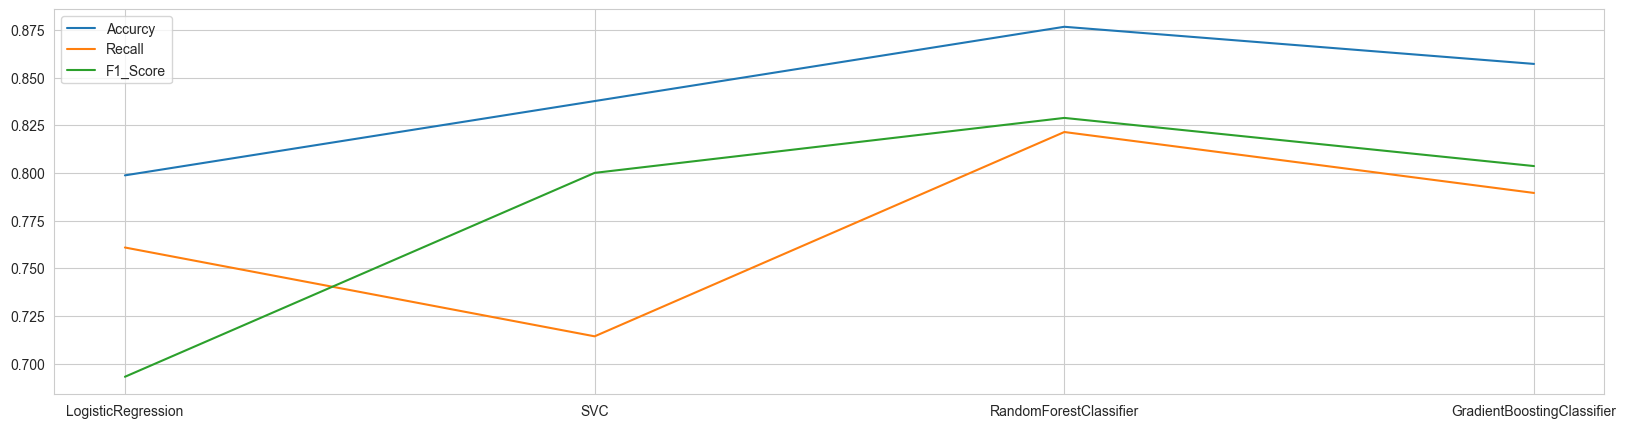

In [48]:
fig,ax = plt.subplots(figsize = (20, 5))
plt.plot(df2.Algorithm,acc_list,label="Accurcy")
plt.plot(df2.Algorithm,recall_list,label="Recall")
plt.plot(df2.Algorithm,f1_list,label="F1_Score")
plt.legend(loc="upper left")  
plt.show()